<a href="https://colab.research.google.com/github/ai6ph/Loan-default-prediction/blob/main/EDA_loan_default_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Anaysis : 
# Using Loan Default data



### Import Python Libraries

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os

# charts:
import matplotlib.pyplot as plt
import seaborn as sns 
color = sns.color_palette()

import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")


# Read the files in the directory

We have one file in the directory. Its named "Default_Fin.csv" and is in the "loan-default-prediction" folder

# Read the file

In [18]:
default = pd.read_csv('https://raw.githubusercontent.com/ai6ph/Loan-default-prediction/main/Default_Fin.csv')

default

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


"loan-default-prediction" has 10,000 rows and 5 columns. 

In [19]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


Note that even though  Employed   and  Defaulted?  appear to be integers, these are boolean (Yes/No) 

There appear to be no missing values. Lets check that again

In [20]:
default.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

Great! No missing values, we do not have to worry about missing value imputation in this data!

Let us understand the data and get some summary statistics

In [21]:
default.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


Ok.. 70.56% of the loan customers are employed

and 3.33% have defaulted. This is a small number and will this is an imbalanced dataset. We will discuss how to handle imbalanced datasets in a bit...

How did i get 3.33%? look at the means... what does mean signify for a boolean?

# Visuliaztions 

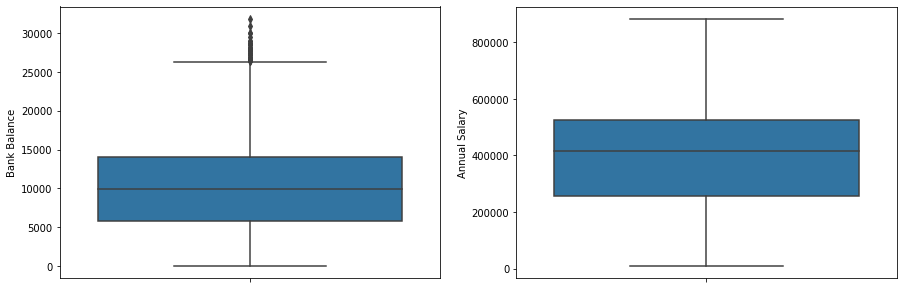

In [22]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = default['Bank Balance'])

plt.subplot(1,2,2)
sns.boxplot(y = default['Annual Salary'])
plt.show()

1    7056
0    2944
Name: Employed, dtype: int64

1    0.7056
0    0.2944
Name: Employed, dtype: float64

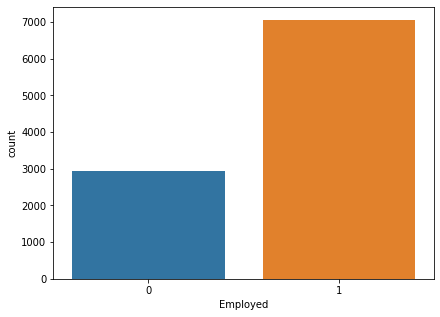

In [23]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(default['Employed'])

display( default["Employed"].value_counts())

default["Employed"].value_counts(normalize=True)

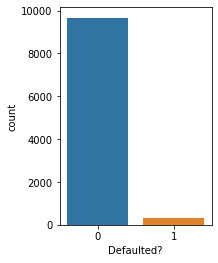

0    9667
1     333
Name: Defaulted?, dtype: int64

0    0.9667
1    0.0333
Name: Defaulted?, dtype: float64

In [24]:
plt.subplot(1,2,2)
sns.countplot(default['Defaulted?'])
plt.show()

display(default["Defaulted?"].value_counts())

default["Defaulted?"].value_counts(normalize = True)

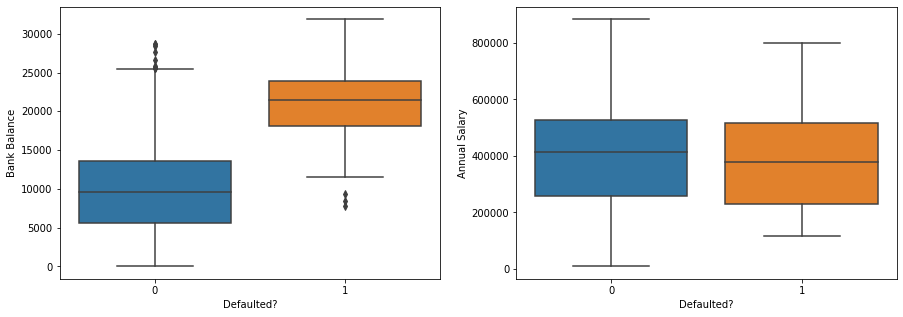

In [25]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(default['Defaulted?'], default['Bank Balance'])

plt.subplot(1,2,2)
sns.boxplot(default['Defaulted?'], default['Annual Salary'])
plt.show()

In [26]:
pd.crosstab(default['Employed'], default['Defaulted?'], normalize = 'index').round(2)

Defaulted?,0,1
Employed,,
0,0.96,0.04
1,0.97,0.03


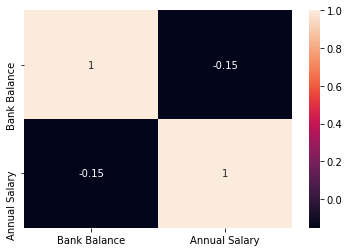

In [27]:
sns.heatmap(default[['Bank Balance', 'Annual Salary']].corr(), annot = True)
plt.show()

In [28]:
Q1, Q3 = default['Bank Balance'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

df = default[default['Bank Balance'] > UL]
df['Defaulted?'].count()

31

# This is interesting!
What do the below indicate?

In [29]:
df['Defaulted?'].value_counts(normalize = True)

1    0.83871
0    0.16129
Name: Defaulted?, dtype: float64

In [30]:
df['Defaulted?'].value_counts()

1    26
0     5
Name: Defaulted?, dtype: int64

In [31]:
default['Bank Balance'] = np.where(default['Bank Balance'] > UL, UL, default['Bank Balance'] )

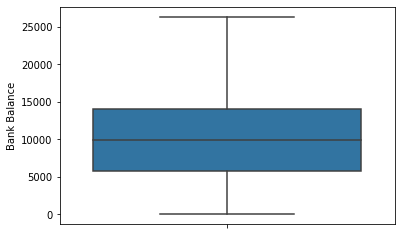

In [32]:
sns.boxplot(y = default['Bank Balance'])
plt.show()

# to be continued ...